<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [4]:
nhl = pd.read_csv('/Users/Indraja/Documents/Dsi/8.3.2_clustering-dbscan-lab/datasets/nhl.csv')


In [5]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [7]:
nhl.Rank.unique()

array([1, 2, 3])

In [8]:
nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [9]:
nhl.TOI = nhl.TOI.apply(lambda x: x.split(':')[0])

In [10]:
nhl.TOI = nhl.TOI.apply(lambda x: int(x))

In [11]:
nhl.TOI

0     2001
1     2056
2     1929
3     2020
4     2052
5     2280
6     2256
7     1942
8     2082
9     2168
10    1935
11    2036
12    2134
13    1984
14    2061
15    2095
16    1752
17    2048
18    1899
19    1908
20    2064
21    2138
22    2002
23    2245
24    2146
25    2003
26    2013
27    2011
28    2293
29    2046
      ... 
60    2172
61    1895
62    1974
63    1967
64    1967
65    2102
66    1874
67    2219
68    2001
69    2055
70    2084
71    1827
72    1883
73    2104
74    2101
75    2005
76    1965
77    1914
78    2202
79    1996
80    2073
81    1950
82    2059
83    2069
84    1991
85    2155
86    2034
87    2129
88    1983
89    1894
Name: TOI, dtype: int64

### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [13]:
# A:
x=nhl.drop(['Rank','PTS','Team'],axis=1)


In [14]:
y=nhl['Rank']

### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

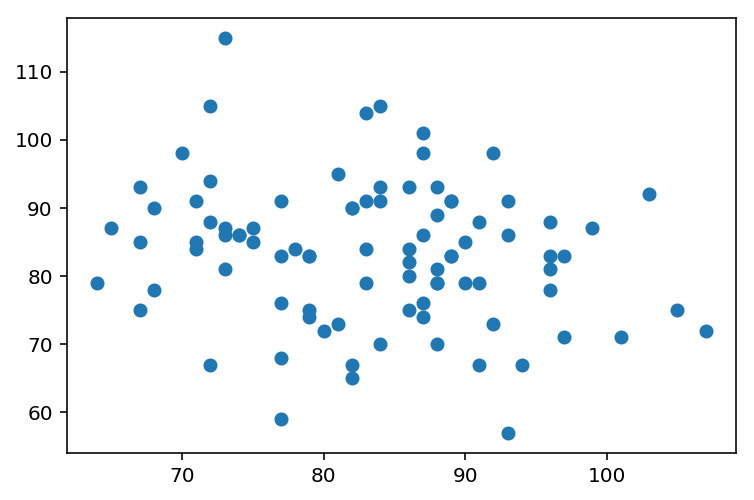

In [16]:
# A:
plt.scatter(x['GA'], x['GF'])

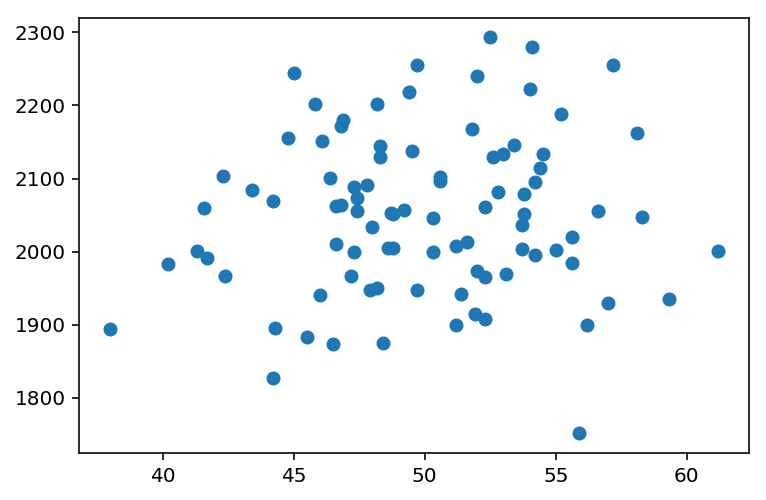

In [19]:
plt.scatter(x['GF%'], x['TOI'])

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [21]:
# A:
# Standardize X
X = StandardScaler().fit_transform(x)


### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [42]:
# A:
dbscn = DBSCAN(eps =3, min_samples = 3).fit(X)

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [43]:
# A:
labels = dbscn.labels_
labels

array([ 0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1,  1, -1, -1,
       -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  2, -1, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0,  0,
       -1, -1, -1,  0,  0, -1,  0,  3,  0, -1, -1, -1,  3, -1,  0, -1, -1,
        4, -1, -1,  3,  3,  0,  2,  2,  1,  0, -1,  1, -1,  0,  2,  2,  4,
        0,  0,  0,  4, -1])

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [44]:
# A:
# identify core samples
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscn.core_sample_indices_] = True
print core_samples

[False  True  True False  True False False False False  True  True False
 False False  True False False False False  True False  True False False
 False False False  True  True False False False  True False  True  True
  True False  True False False  True  True False False  True False False
 False  True  True False False False  True  True False  True  True  True
 False False False  True False  True False False  True False False False
  True False  True False  True  True False  True False False False  True
  True  True  True  True  True False]


In [45]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

5


**7.2 Check the homogeneity, completeness, and V-measure against the stored rank `y`**

In [46]:
# A:
print 'Estimated number of clusters: %d' % n_clusters_
print "Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels)
print "Completeness: %0.3f" % metrics.completeness_score(y, labels)
print "V-measure: %0.3f" % metrics.v_measure_score(y, labels)

Estimated number of clusters: 5
Homogeneity: 0.118
Completeness: 0.103
V-measure: 0.110


In [48]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Silhouette Coefficient: -0.012


### 8. Plot the clusters

You can choose any two variables for the axes.

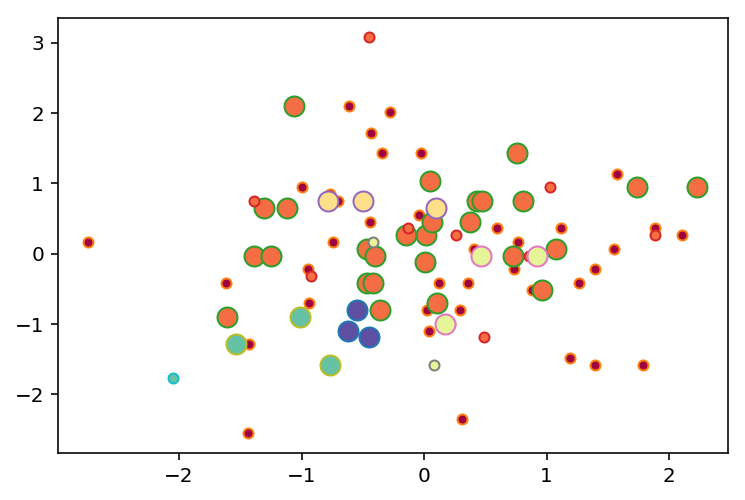

In [52]:

#plot our clusters
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)

    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)
    


### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

In [53]:
# A:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

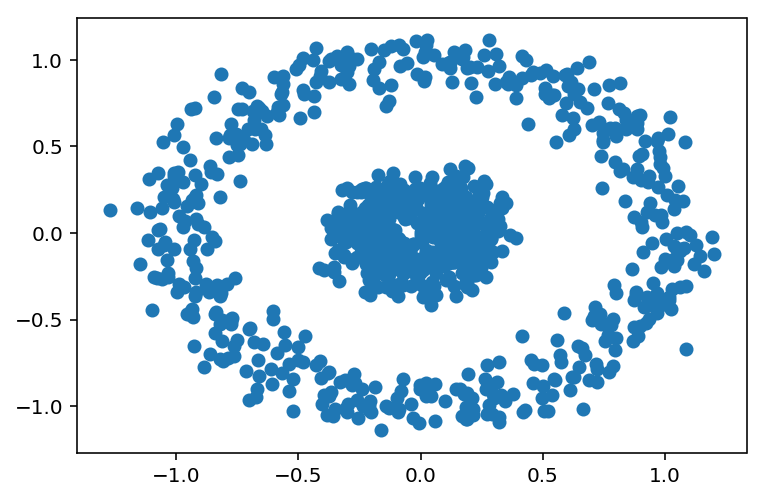

In [57]:
plt.scatter(circles_X[:,0], circles_X[:,1])

**9.2 Scale the data and fit DBSCAN on it.**

In [58]:
# A:
X = StandardScaler().fit_transform(circles_X)

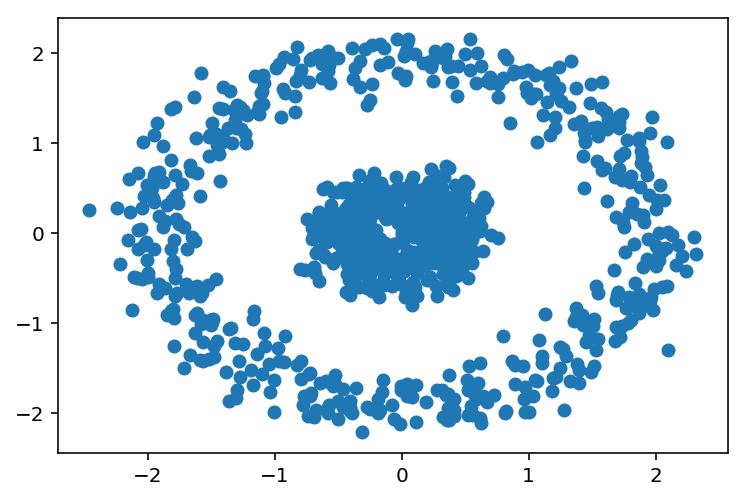

In [61]:

# Explore our data to look or potential clusters - see any?
plt.scatter(X[:,0], X[:,1])

#plt.scatter(X[:,1], X[:,2])

#plt.scatter(X[:,2], X[:,3])

**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

In [63]:
# A:
dbscn = DBSCAN(eps = .5, min_samples = 3).fit(X)

In [64]:
# set labels
labels = dbscn.labels_
print(labels) # comprehension: what do these mean? How many are there?

# identify core samples
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscn.core_sample_indices_] = True
print(core_samples)


# declare number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 0 1 1 1 

In [67]:
# Now, we can use a handy chunk of code from the Scitkit documentation to measure the performance of our model
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(circles_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(circles_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(circles_y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Silhouette Coefficient: 0.238


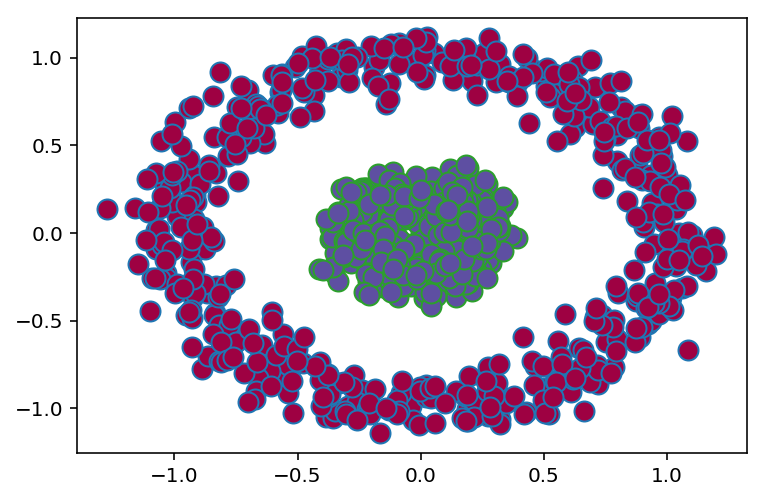

In [68]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = circles_X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)

    n = circles_X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)
